# classify without label
1. if we have sample 
2. if sample have label
3. then we can label more sample, that's classify
4. here we classify all sample without label

### do it

In [155]:
output_file = "/home/qin/pockit/data/word2vec_output.txt"

In [156]:
!pip install numpy
!pip install matplotlib
!pip install sklearn

import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

word2vec = json.load(open(output_file,'r'))
print('> show the data struct')
word2vec['1']

def format_vec(word2vec):
    lst2d = []
    for key in word2vec:
        lst = [float(i) for i in word2vec[key]['vec'].split(',')]
        lst2d.append(lst)
    return np.array(lst2d)        


> show the data struct


In [157]:
# get all vec of my
# show the vec of sentence on board

from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 
#iris = load_iris()
#iris.data.shape
vec_data = format_vec(word2vec)
X_tsne = TSNE(learning_rate=100).fit_transform(vec_data)
X_pca = PCA().fit_transform(vec_data)
 

((8753, 768), (8753, 2))

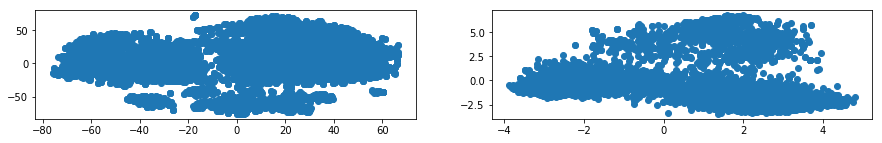

In [158]:
plt.figure(figsize=(15, 2))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
X_pca.shape,X_tsne.shape

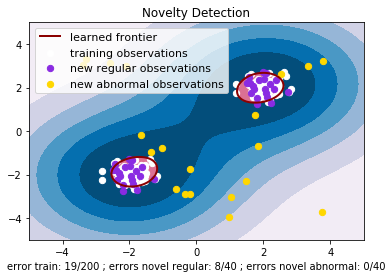

In [159]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

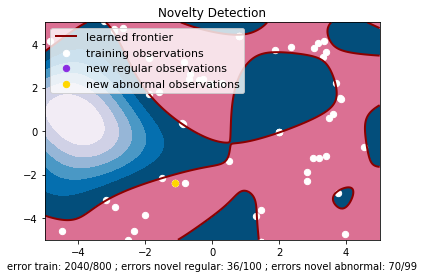

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
"""

X_train = X_pca[:800,:2]
X_test = X_pca[800:900,:2]
X_outliers = X_pca[900:,:2]

"""
X_train = X_tsne[:-100]
X_test = X_tsne[-100:]
X_outliers = X_tsne[-200:-100]

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)


n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/800 ; errors novel regular: %d/100 ; "
    "errors novel abnormal: %d/99"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()



In [161]:


flag = 1

for i,j in zip(word2vec,y_pred_train):
    #print(j)
    if j == flag:
        print(word2vec[i]['sent'])


小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
05:42分18077202912再报：民警来了吗？"
黄先生报警称：柳工大道柳工颐华城4栋地下停车场，我的电动车停放在这里，电瓶被盗了，价值600元。
解放北路中医院门口，我停放在这的一辆价值3200元的蓝色南都牌电动车被盗，你不要问那么多了，我的电动车刚刚被偷的，快点过来。
小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
03:08分（18823210401）再报：刚才我朋友用13788723391电话报过警，请问民警来了吗？我们已经报了一个小时了。
陆先生报警称：蟠龙路窰埠小学路段新路柳建工地里面，我停放在这的一辆价值3000多元的白色电动车被盗，车子品牌和车牌号码不记得了，未安装车安网防盗定位装置。
陆先生报警称：蟠龙路窰埠小学路段新路柳建工地里面，我停放在这的一辆价值3000多元的白色电动车被盗，车子品牌和车牌号码不记得了，未安装车安网防盗定位装置。
韦先生报警称： 柳邕路柳南万达广场金街17栋36号门面门口，我停放在这里的一辆价值2800元的黑色会美牌电动车（桂BLG065）被盗，当时没有锁大锁，安装车安网防盗系统。登记电话：15878927299或者15289623105，户主：韦小莲
覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁大锁，未安装车安网防盗定位装置。
韦先生报警称： 柳邕路柳南万达广场金街17栋36号门面门口，我停放在这里的一辆价值2800元的黑色会美牌电动车（桂BLG065）被盗，当时没有锁大锁，安装车安网防盗系统。登记电话：15878927299或者15289623105，户主：韦小莲
张先生报警称：中山中路五星社区服务中心门口，我刚发现停在这里的一辆价值2500元的黑色爱俊达牌电动车（桂BHG967 ）被盗，当时有锁大锁，没有安装车安网防盗系统。
梁女士报警称：白云路书市门口，我停放在这里的一辆价值2600元的色电动车（桂BKE679）被盗，当时没有锁大锁了，未安装车安网防盗系统，我现在不在现场了。
韦先生报警称： 柳邕路柳南万达广场金街17栋36号门面门口，我停放在这里的一辆价值2800元的黑色会美牌电动车（桂BLG065）被盗，当时没有锁大锁，

覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁大锁，未安装车安网防盗定位装置。
陆先生报警称：蟠龙路窰埠小学路段新路柳建工地里面，我停放在这的一辆价值3000多元的白色电动车被盗，车子品牌和车牌号码不记得了，未安装车安网防盗定位装置。
05:42分18077202912再报：民警来了吗？"
08:03分韦女士（15278881205）报警称：健民路地区医院实习生宿舍楼下，我停放在此的电动车被盗电瓶，电瓶价值不详，旁边还有七辆电动车被盗电瓶，需要民警处理。
解放北路中医院门口，我停放在这的一辆价值3200元的蓝色南都牌电动车被盗，你不要问那么多了，我的电动车刚刚被偷的，快点过来。
梁女士报警称：白云路书市门口，我停放在这里的一辆价值2600元的色电动车（桂BKE679）被盗，当时没有锁大锁了，未安装车安网防盗系统，我现在不在现场了。
03:23分18178292199  韦先生报警称：潭中西路妇幼保健院对面御和园养生会所门口，我停在这里的电动车电瓶被盗，价值500元，我看见旁边有几辆电动车电瓶也被盗了，具体不知道几辆被盗。"
柳工大道柳工颐华城小区建设银行门口，我停放在这里的一辆价值1100元的黄色爱玛牌电动车被盗，当时锁大锁，没有安装车安网防盗系统。
覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁大锁，未安装车安网防盗定位装置。
08:03分韦女士（15278881205）报警称：健民路地区医院实习生宿舍楼下，我停放在此的电动车被盗电瓶，电瓶价值不详，旁边还有七辆电动车被盗电瓶，需要民警处理。
覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁大锁，未安装车安网防盗定位装置。
解放北路中医院门口，我停放在这的一辆价值3200元的蓝色南都牌电动车被盗，你不要问那么多了，我的电动车刚刚被偷的，快点过来。
韦先生报警称： 柳邕路柳南万达广场金街17栋36号门面门口，我停放在这里的一辆价值2800元的黑色会美牌电动车（桂BLG065）被盗，当时没有锁大锁，安装车安网防盗系统。登记电话：15878927299或者15289623105，户主：韦

柳工大道柳工颐华城小区建设银行门口，我停放在这里的一辆价值1100元的黄色爱玛牌电动车被盗，当时锁大锁，没有安装车安网防盗系统。
03:23分18178292199  韦先生报警称：潭中西路妇幼保健院对面御和园养生会所门口，我停在这里的电动车电瓶被盗，价值500元，我看见旁边有几辆电动车电瓶也被盗了，具体不知道几辆被盗。"
03:23分18178292199  韦先生报警称：潭中西路妇幼保健院对面御和园养生会所门口，我停在这里的电动车电瓶被盗，价值500元，我看见旁边有几辆电动车电瓶也被盗了，具体不知道几辆被盗。"
23:55分（15278867919）报：雒容镇以斯贴酒店后出租房，我停在这里的电动车电瓶被盗了，我今天报过警。（通话过程中系统故障，电话被挂断，接警坐席自动置闲，回拨报警人电话显示在通话中）
黄先生报警称：柳工大道柳工颐华城4栋地下停车场，我的电动车停放在这里，电瓶被盗了，价值600元。
小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
05:42分18077202912再报：民警来了吗？"
解放北路中医院门口，我停放在这的一辆价值3200元的蓝色南都牌电动车被盗，你不要问那么多了，我的电动车刚刚被偷的，快点过来。
03:08分（18823210401）再报：刚才我朋友用13788723391电话报过警，请问民警来了吗？我们已经报了一个小时了。
08:03分韦女士（15278881205）报警称：健民路地区医院实习生宿舍楼下，我停放在此的电动车被盗电瓶，电瓶价值不详，旁边还有七辆电动车被盗电瓶，需要民警处理。
03:08分（18823210401）再报：刚才我朋友用13788723391电话报过警，请问民警来了吗？我们已经报了一个小时了。
陆先生报警称：蟠龙路窰埠小学路段新路柳建工地里面，我停放在这的一辆价值3000多元的白色电动车被盗，车子品牌和车牌号码不记得了，未安装车安网防盗定位装置。
03:23分18178292199  韦先生报警称：潭中西路妇幼保健院对面御和园养生会所门口，我停在这里的电动车电瓶被盗，价值500元，我看见旁边有几辆电动车电瓶也被盗了，具体不知道几辆被盗。"
小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
梁女士报警称：白云路书市门口，我停放在这里的一辆价值2600元的

解放北路中医院门口，我停放在这的一辆价值3200元的蓝色南都牌电动车被盗，你不要问那么多了，我的电动车刚刚被偷的，快点过来。
小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
柳工大道柳工颐华城小区建设银行门口，我停放在这里的一辆价值1100元的黄色爱玛牌电动车被盗，当时锁大锁，没有安装车安网防盗系统。
08:03分韦女士（15278881205）报警称：健民路地区医院实习生宿舍楼下，我停放在此的电动车被盗电瓶，电瓶价值不详，旁边还有七辆电动车被盗电瓶，需要民警处理。
05:42分18077202912再报：民警来了吗？"
覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁大锁，未安装车安网防盗定位装置。
05:42分18077202912再报：民警来了吗？"
小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
23:55分（15278867919）报：雒容镇以斯贴酒店后出租房，我停在这里的电动车电瓶被盗了，我今天报过警。（通话过程中系统故障，电话被挂断，接警坐席自动置闲，回拨报警人电话显示在通话中）
小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
03:08分（18823210401）再报：刚才我朋友用13788723391电话报过警，请问民警来了吗？我们已经报了一个小时了。
龙屯路金色蓝庭小区1栋楼下，下午1点钟我发现电动车电瓶（价值：700）被盗，当时没有及时报案，我现在在物业看到监控是两名男子偷的，我要求民警到现场调取监控处理。
梁女士报警称：白云路书市门口，我停放在这里的一辆价值2600元的色电动车（桂BKE679）被盗，当时没有锁大锁了，未安装车安网防盗系统，我现在不在现场了。
梁女士报警称：白云路书市门口，我停放在这里的一辆价值2600元的色电动车（桂BKE679）被盗，当时没有锁大锁了，未安装车安网防盗系统，我现在不在现场了。
小南路爱民螺蛳粉门口，我的电动车电瓶被盗，价值不详，旁边还有电动车被盗电瓶。
龙屯路金色蓝庭小区1栋楼下，下午1点钟我发现电动车电瓶（价值：700）被盗，当时没有及时报案，我现在在物业看到监控是两名男子偷的，我要求民警到现场调取监控处理。
覃先生报警称：羊角山路羊角山五

张先生报警称：中山中路五星社区服务中心门口，我刚发现停在这里的一辆价值2500元的黑色爱俊达牌电动车（桂BHG967 ）被盗，当时有锁大锁，没有安装车安网防盗系统。
梁女士报警称：白云路书市门口，我停放在这里的一辆价值2600元的色电动车（桂BKE679）被盗，当时没有锁大锁了，未安装车安网防盗系统，我现在不在现场了。
黄先生报警称：柳工大道柳工颐华城4栋地下停车场，我的电动车停放在这里，电瓶被盗了，价值600元。
柳工大道柳工颐华城小区建设银行门口，我停放在这里的一辆价值1100元的黄色爱玛牌电动车被盗，当时锁大锁，没有安装车安网防盗系统。
覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁大锁，未安装车安网防盗定位装置。
陆先生报警称：蟠龙路窰埠小学路段新路柳建工地里面，我停放在这的一辆价值3000多元的白色电动车被盗，车子品牌和车牌号码不记得了，未安装车安网防盗定位装置。
韦先生报警称： 柳邕路柳南万达广场金街17栋36号门面门口，我停放在这里的一辆价值2800元的黑色会美牌电动车（桂BLG065）被盗，当时没有锁大锁，安装车安网防盗系统。登记电话：15878927299或者15289623105，户主：韦小莲
梁女士报警称：白云路书市门口，我停放在这里的一辆价值2600元的色电动车（桂BKE679）被盗，当时没有锁大锁了，未安装车安网防盗系统，我现在不在现场了。
陆先生报警称：蟠龙路窰埠小学路段新路柳建工地里面，我停放在这的一辆价值3000多元的白色电动车被盗，车子品牌和车牌号码不记得了，未安装车安网防盗定位装置。
柳工大道柳工颐华城小区建设银行门口，我停放在这里的一辆价值1100元的黄色爱玛牌电动车被盗，当时锁大锁，没有安装车安网防盗系统。
龙屯路金色蓝庭小区1栋楼下，下午1点钟我发现电动车电瓶（价值：700）被盗，当时没有及时报案，我现在在物业看到监控是两名男子偷的，我要求民警到现场调取监控处理。
覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁大锁，未安装车安网防盗定位装置。
覃先生报警称：羊角山路羊角山五队南区41号，我停放在这的一辆价值3000多元的红色欧派牌电动车（桂BB5830）被盗，当时有锁